<a href="https://colab.research.google.com/github/afeld/nyu-python-public-policy/blob/master/hw_5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Solutions to HW 5: Linear regression and correlation analysis
The relationship between concentration of homeless shelters and count of 311 requests related to homeless services

## Importing necessary packages

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Problem Statement**:
Homelesses is a big concern in New York City. The Department of Homeless Services is tasked with providing services and housing for people who are homeless. They recently began publishing the count of homeless shelter buildings per community district on NYC Open Data to provide more transparency into where shelters are located. The dataset provides counts in multiple columns for different categories of buildings. It also includes counts from different reporting dates.

The 311 Service Requests dataset includes a complaint type called "Homeless Person Assistance". Let's find out if there's a relationship between the number of homeless assistance 311 requests and the concentration of homeless shelter buildings per community district.

**Step 1**. Load the datasets:
- Cleaned 311 data that excludes records eith invalid community districts. Shared with you on Google Drive as `cleaned_311_data_revised.csv`
- NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district. 
  - Data source page: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
  - CSV data download link you can plug into the `pd.read_csv()` function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD

In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# data source: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
shelters_per_cd = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [0]:
shelters_per_cd.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


**Step 2**. Filter the dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [0]:
# getting this unique list of Report Date values
set(shelters_per_cd['Report Date'])

{'01/31/2019',
 '04/10/2019',
 '04/30/2019',
 '05/31/2019',
 '06/30/2019',
 '07/31/2018',
 '08/31/2018',
 '08/31/2019',
 '09/30/2018',
 '09/30/2019',
 '10/31/2018',
 '10/31/2019',
 '11/30/2018',
 '12/31/2018'}

In [0]:
shelters_per_cd = shelters_per_cd[shelters_per_cd['Report Date'] == '09/30/2019']

In [0]:
shelters_per_cd

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
# uh oh, the all bronx community districts are repeated twice; they have exact duplicates
# we need to drop the duplicate records

shelters_per_cd = shelters_per_cd.drop_duplicates()
# this drops records where all columns are exactly the same except for the index

shelters_per_cd

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


**Step 3**. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

- Tip: There are multiple ways to add these columns together. With one approach, you may find that your total column contains NaN values. This is because many of the columns contains NaN/empty values. When you add a real number to a NaN, the sum will be NaN. To get around this, you will need to fill in all the NaN values with 0 instead. Use the `.fillna(0)` method on your shelter count dataframe.

In [0]:
# getting list of column names so they're easy to copy/paste
shelters_per_cd.columns

Index(['Report Date', 'Borough', 'Community District',
       'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter',
       'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel',
       'FWC Shelter'],
      dtype='object')

Option 1 for adding columns together

In [0]:
# fill in zeros where there are NaNs. this will allow us to add them.
shelters_per_cd = shelters_per_cd.fillna(0)

In [0]:
shelters_per_cd['total'] = shelters_per_cd['Adult Family Comm Hotel'] + shelters_per_cd['Adult Family Shelter'] + shelters_per_cd['Adult Shelter'] + shelters_per_cd['Adult Shelter Comm Hotel'] + shelters_per_cd['FWC Cluster'] + shelters_per_cd['FWC Comm Hotel'] + shelters_per_cd['FWC Shelter']

In [0]:
# check that total column looks correct
shelters_per_cd

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


Option 2 for adding columns together

In [0]:
# create a list that captures all the columns we want to add togethewr
columns_to_sum = ['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter']

# .sum() uses the list of columns provided and takes the sum across them
shelters_per_cd['total'] = shelters_per_cd[columns_to_sum].sum(axis=1)

In [0]:
# check that total column looks correct
shelters_per_cd.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


**Step 4**. From the 311 dataset, create a subset of all the 311 requests where `complaint_type == 'Homeless Person Assistance'`

In [0]:
dhs_complaints = df[df.complaint_type == 'Homeless Person Assistance']

**Step 5**. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [0]:
dhs_complaints_cd = dhs_complaints.groupby('borocd').size().reset_index(name='count_dhs_requests')

**Step 6**. Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).
- Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the `.fillna(0)` method on your dataframe.

In [0]:
merged_cd = pd.merge(how='left', left=dhs_complaints_cd, right=shelters_per_cd, left_on='borocd', right_on='Community District')
merged_cd.head()

,borocd,count_dhs_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


In [0]:
# fill in zeros for borocd rows like 102 that don't have any shelter buildings in them
merged_cd = merged_cd.fillna(0)
merged_cd.head()

,borocd,count_dhs_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


**Step 7**. Produce a scatter plot of the data using the `matplotlib` package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

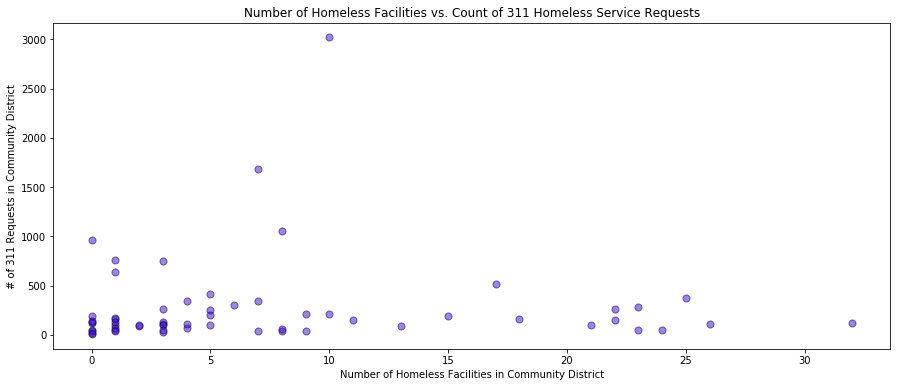

In [0]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_cd.total), # x: array that fits within the range of the "total" column's values
    np.array(merged_cd.count_dhs_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

**Step 8**. Use `np.corrcoef(x, y)` to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [0]:
np.corrcoef(merged_cd.total, merged_cd.count_dhs_requests)

array([[1.        , 0.01073618],
       [0.01073618, 1.        ]])

Very low positive correlation

**Step 9**. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [0]:
y = merged_cd.count_dhs_requests

x = merged_cd.total
# let's add a y intercept to our model
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     count_dhs_requests   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.006571
Date:                Mon, 02 Dec 2019   Prob (F-statistic):              0.936
Time:                        03:05:37   Log-Likelihood:                -445.94
No. Observations:                  59   AIC:                             895.9
Df Residuals:                      57   BIC:                             900.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.4772     83.126      3.302      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The R2 value tells us 0% of variance in y can be explained by x

**Step 10**. Produce a scatter plot of the data with the line of best fit from your linear regression using the `matplotlib` package

In [0]:
# see model parameters
model.params

# create label for line of best fit
label = 'y = ' + str(round(model.params[0],2)) + ' + ' + str(round(model.params[1],2)) + 'x'
print(label)

y = 274.48 + 0.6x


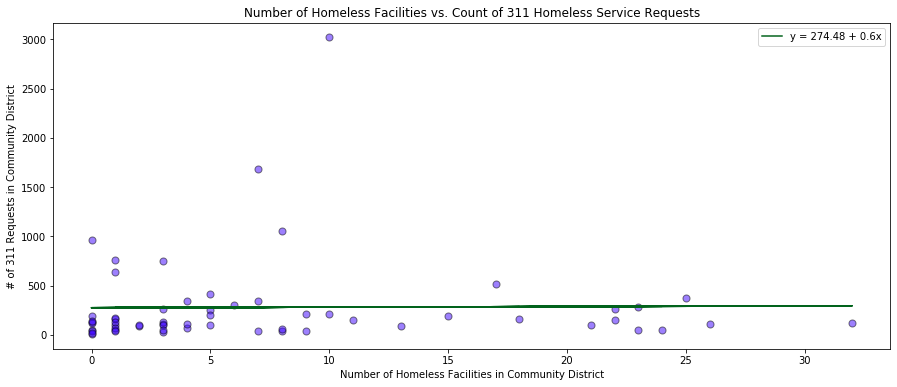

In [0]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_cd.total), # x: array that fits within the range of the "total" column's values
    np.array(merged_cd.count_dhs_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit
plt.plot(
    np.array(merged_cd.total), 
    model.params[0] +  model.params[1]*np.array(merged_cd.total),
    c='#02631c', # darker green
    label=label)

plt.title('Number of Homeless Facilities vs. Count of 311 Homeless Service Requests')
plt.xlabel('Number of Homeless Facilities in Community District')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

**Step 11**: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?


**Answer**:
There isn't a clear relationship between the concentration of homeless facilities per community district and count of 311 requests for homeless services. There is a very low negative correlation and the linear regression model using number of shelter buildings can't explain any variance in the number of 311 requests.

**Potential Explanation**:
After reading more about Dept. of Homeless Services' programs ([article/video link](https://www1.nyc.gov/site/dhs/outreach/street-outreach.page)), it seems like the 'Homeless Person Assistance' 311 requests are targeted at helping people who live on the streets rather than in shelters. According to the most recent [Homeless Outreach Population Estimate (HOPE)](https://www1.nyc.gov/site/dhs/outreach/hope.page), unsheltered homeless people live in the greatest numbers in Manhattan and on the subways. The counts of 311 requests reflect this trend. The community districts with the highest counts are all in Manhattan except for Brooklyn 2 (Downtown Brooklyn). It doesn't seem like the presence of homeless shelters in community districts is an attractive force that influences the number of 311 homeless service requests, and the sheltered populations in those areas are already receiving services.

In [0]:
dhs_complaints.groupby('borocd').size().nlargest(10).reset_index(name='count_dhs_requests')

,borocd,count_dhs_requests
0,105.0,3020
1,107.0,1684
2,104.0,1055
3,102.0,965
4,101.0,758
5,106.0,753
6,108.0,633
7,103.0,520
8,302.0,414
9,111.0,373


Map of community districts for reference:

![CD map](https://upload.wikimedia.org/wikipedia/commons/4/41/New_York_City_community_districts.svg)